<a href="https://colab.research.google.com/github/MaiAbuJasser/deep-learning_for_vision_systems/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib as mpl   
import matplotlib.pyplot as plt
from matplotlib import image 

In [ ]:
training_images = np.load('training_images.npy')
training_labels = np.load('training_labels.npy')
testing_images = np.load('test_images.npy')
testing_labels = np.load('test_labels.npy')

print ("Training Images Shape: " + str(training_images.shape))
print ("Training Labels Shape: " + str(training_labels.shape))
print ("Testing  Images Shape: " + str(testing_images.shape))
print ("Testing  Labels Shape: " + str(testing_labels.shape))

Training Images Shape: (6000, 32, 32)
Training Labels Shape: (6000,)
Testing  Images Shape: (1722, 32, 32)
Testing  Labels Shape: (1722,)


In [ ]:
for x in np.nditer(training_labels):
    print(x, end=' ') #training_labels is the ascii of letters

75 81 70 67 80 89 84 85 86 72 83 86 66 88 84 84 71 66 66 82 75 75 77 69 76 75 68 82 85 86 77 84 83 81 88 72 77 67 73 82 81 79 74 69 90 74 80 81 85 76 78 71 85 81 77 71 87 83 66 65 65 90 77 85 74 65 84 86 81 69 77 67 73 89 74 88 74 81 82 90 76 71 76 82 77 65 66 88 67 66 72 82 65 75 68 69 72 87 75 86 72 65 76 87 85 80 72 89 75 74 80 86 74 66 76 84 77 82 79 65 84 85 69 89 90 75 85 88 70 67 77 84 87 68 87 75 87 80 74 84 78 85 82 65 85 87 67 89 66 66 73 89 83 81 83 66 90 67 72 74 71 75 86 86 79 81 68 74 71 65 80 80 77 77 89 67 69 85 79 76 90 87 79 72 72 83 65 70 69 86 73 67 69 76 85 82 90 81 87 71 78 69 85 70 76 84 77 84 66 78 74 86 70 75 89 72 78 85 75 79 70 80 66 75 76 71 84 77 81 72 78 87 77 66 78 69 65 75 81 79 75 76 87 85 72 76 79 73 74 81 89 84 67 83 66 65 73 90 74 82 86 66 70 69 76 66 66 79 68 80 75 81 76 89 82 68 90 78 74 89 81 65 69 73 87 75 67 74 78 84 87 70 89 89 69 79 65 70 81 65 85 90 88 82 78 90 76 69 70 89 86 90 79 73 73 84 87 82 68 77 68 81 83 73 75 89 72 74 66 79 72 88 82 8

#splitting data to groups

In [ ]:
def get_char_images (ascii_code):
   return training_images[training_labels[:]== ascii_code] 

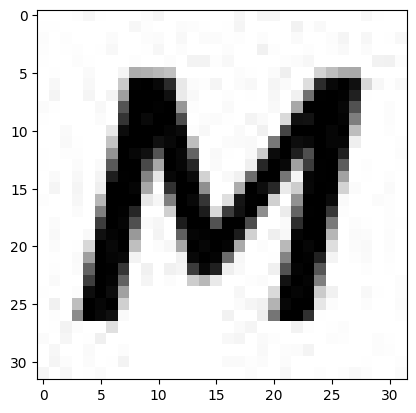

In [ ]:
M_images = get_char_images(ord("M")) #ord take string as an input and convert it from character unicode to integer unicode
plt.imshow(M_images[1], cmap='gray_r')
plt.show()

In [ ]:
print(M_images.size) # I do it just for test and know the number of images have the letter M. and i noticed not all images are the same 
#not identical images 

238592


#Prepear data for prediction

In [ ]:
def get_char_mean (char):
 return get_char_images(char).mean(axis=0)
    

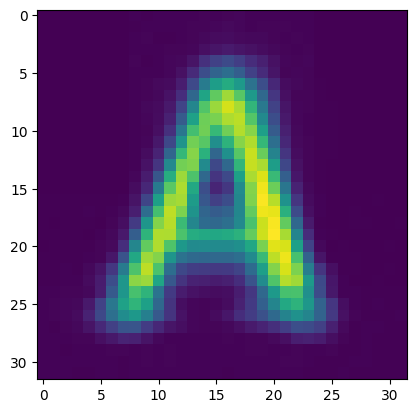

In [ ]:
A_mean = get_char_mean(ord("A"))
plt.imshow(A_mean)
plt.show()

In [ ]:
import string
char_means = []
for i in range(26):
 char_means.append(get_char_mean(ord('A') + i))

(26, 32, 32)


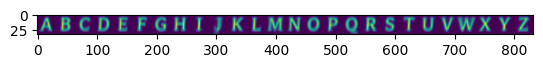

In [ ]:
numbers_means = np.empty((26, 32, 32))
for i in range(26):
    numbers_means[i] = get_char_mean(ord('A') + i)
means = np.concatenate(numbers_means, axis=1)
print(numbers_means.shape)
plt.imshow(means)
plt.show()

#Predict the charcter of an image

In [ ]:
def predict (test_image):
    MSE = ((numbers_means - test_image)**2).mean(axis=(1,2))
    predicted_ascii = np.argmin(MSE)+ord("A")
    return predicted_ascii
    #index is an array represent the diff between all the means of all characters and our test_img then i choose the min one
    #we use **2 to take care of bigger diffrences and make it positive abs is not good choice with it the accuracy is worse 


In [ ]:
predicted_labels = np.empty(testing_labels.shape, dtype=testing_labels.dtype)
for i in range(len(predicted_labels)):
    predicted_labels[i] = predict(testing_images[i])

In [ ]:
correct_predictions = np.sum(predicted_labels == testing_labels)
accuracy = correct_predictions / len(predicted_labels)
print("Model accuracy = "+str(accuracy*100) + "%")

Model accuracy = 78.16492450638792%


In [ ]:
from sklearn.metrics import confusion_matrix

# Get the predicted labels for the testing images
predicted_labels = np.empty(testing_labels.shape, dtype=testing_labels.dtype)
for i in range(len(predicted_labels)):
    predicted_labels[i] = predict(testing_images[i])

# Calculate the confusion matrix
cm = confusion_matrix(testing_labels, predicted_labels)

# Print the confusion matrix
print(cm)

[[53  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0 44  2  0  1  4  0  2  0  0  0  0  0  0  0  0  0  4  2  0  1  0  0  0
   0  0]
 [ 0  0 55  0  3  1  3  0  0  1  0  2  0  0  1  0  0  0  0  0  1  0  0  0
   0  0]
 [ 0  6  1 42  0  0  0  0  0  2  0  2  0  0  3  3  1  1  0  0  8  0  0  0
   0  0]
 [ 0  2  1  0 47  6  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  3 61  0  0  0  1  0  3  0  0  0  1  0  0  0  0  0  0  0  1
   0  1]
 [ 0  2  9  0  0  1 43  0  0  0  0  0  0  0  4  0  0  0  0  0  4  0  0  0
   0  0]
 [ 0  2  0  0  0  0  0 44  0  1  0  0  0  0  0  2  0  4  0  0  4  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 73  5  0  0  0  0  0  0  0  0  0  5  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 20 41  0  0  0  0  0  0  0  0  2  0  1  0  0  0
   0  0]
 [ 0  1  1  0  0  3  0  0  0  0 59  0  0  1  0  0  0  1  0  0  0  0  0  3
   0  0]
 [ 0  0  1  0  0  0  0  0  1  1  0 66  0  0  0  0  0  0  0  0  0  0  0  0
   0  1]
 [ 0

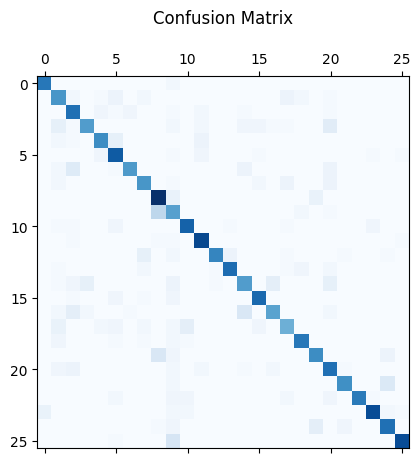

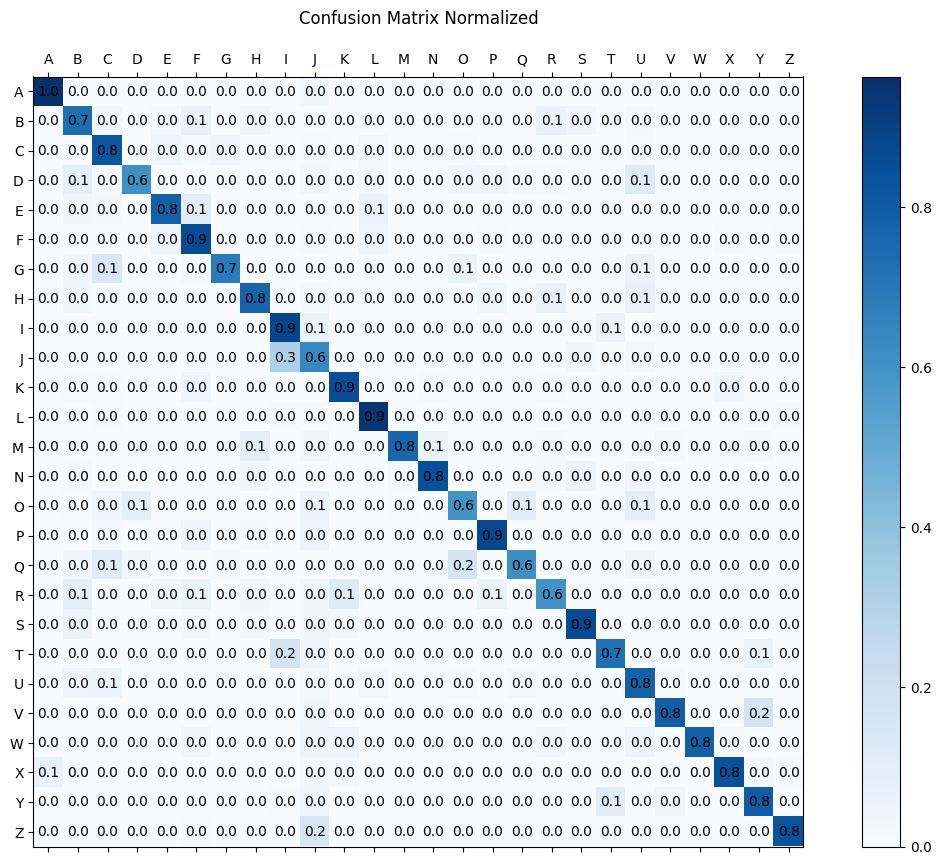

In [ ]:
confusion = np.zeros(shape=(26, 26))
confusion_normilized = np.zeros(shape=(26, 26))

for true_label in range (26):
    for predicted_label in range(26):
        confusion[true_label, predicted_label] = np.sum (np.logical_and((predicted_labels) == (predicted_label + 65), testing_labels == (true_label+65)))
    confusion_normilized[true_label, :] = confusion[true_label, :] / np.sum(testing_labels == (true_label + 65))

plt.matshow(confusion, cmap='Blues')
plt.title("Confusion Matrix\n")
plt.show()


plt.figure(figsize=(15,10))
ax = plt.subplot()
ix = ax.matshow(confusion_normilized, cmap='Blues')
for (i, j), z in np.ndenumerate(confusion_normilized):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

alpha_labels = np.array([chr(code) for code in range(ord('A'), ord('Z')+1)])
plt.xticks(range(26), alpha_labels)
plt.yticks(range(26), alpha_labels)
plt.colorbar(ix)
plt.title("Confusion Matrix Normalized\n")
plt.show()






#Predict a full text

(32, 960)
30


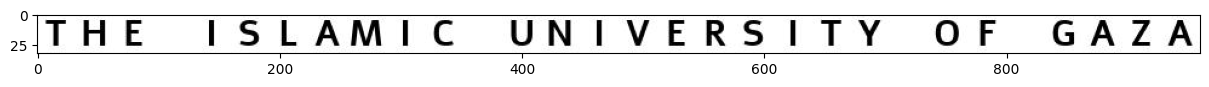

In [ ]:
iug_test = image.imread('iug.jpg')[:,:,0]
print(iug_test.shape)
print(int(len(iug_test[1]) / len(iug_test)))
plt.figure(figsize=(15,5))
plt.imshow(iug_test, cmap='gray_r')
plt.show()


In [ ]:
!pip install pytesseract


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (4,736 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [ ]:
import pytesseract
from PIL import Image

# Open the image
image = Image.open("iug.jpg")

# Use pytesseract to extract text from the image
text = pytesseract.image_to_string(image)

# Print the extracted text
print(text)

THE ISLAMIC UNIVERSITY OF GAZA



In [ ]:
text_withoutspace= text.replace(" ", "")
print(text_withoutspace)


THEISLAMICUNIVERSITYOFGAZA



In [ ]:
import pytesseract
import cv2
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'
def predict_text (img):   
   #return pytesseract.image_to_string(img)  
   predicted_text = ''
   no_space= ''
   count = 0 
   for r in range(0,img.shape[0],32): #0 is rows direction, 32*32 pixels
        for c in range(0,img.shape[1],32): #for columns
            cv2.imwrite(f"img{r}_{c}.jpg",img[r:r+32, c:c+32]) #name the image by the row(always row0)and the column
            #the column will be increased by 32 as every character is 32*32, this image is saved locally in the folder
            #step is by 32 for both rows and columns to take one character each step as in the above figure
            imge='img'+str(r)+'_'+str(c)+'.jpg' #single character image (which is splitted), take it from the folder
            full_img = image.imread(imge)[:,:] #read the full image to predict its letter
            if np.mean(full_img) != 0: #so there is a character
                print(" Prediction: "+ str(predict(full_img))+" in ascii "+chr(predict(full_img))) #convert the predicted num to string to be printed
                predicted_text+=(chr(predict(full_img))) #the ascii for each character prediction
                no_space+=(chr(predict(full_img))) #the ascii for the prediction
                count= count +1 #to walk to next character
            else: 
                predicted_text+=" " #mean = 0 so we have a space, take in considration it in the predicted text
   print(f"the predicted text is {predicted_text}")
   print(f"the predict text without spaces is {no_space}")
   print("the original text is "+ pytesseract.image_to_string(img))

In [ ]:
print(predict_text(iug_test))

 Prediction: 84 in ascii T
 Prediction: 72 in ascii H
 Prediction: 69 in ascii E
 Prediction: 73 in ascii I
 Prediction: 83 in ascii S
 Prediction: 76 in ascii L
 Prediction: 65 in ascii A
 Prediction: 77 in ascii M
 Prediction: 73 in ascii I
 Prediction: 67 in ascii C
 Prediction: 85 in ascii U
 Prediction: 78 in ascii N
 Prediction: 73 in ascii I
 Prediction: 86 in ascii V
 Prediction: 69 in ascii E
 Prediction: 82 in ascii R
 Prediction: 83 in ascii S
 Prediction: 73 in ascii I
 Prediction: 84 in ascii T
 Prediction: 89 in ascii Y
 Prediction: 79 in ascii O
 Prediction: 70 in ascii F
 Prediction: 71 in ascii G
 Prediction: 65 in ascii A
 Prediction: 90 in ascii Z
 Prediction: 65 in ascii A
the predicted text is THE ISLAMIC UNIVERSITY OF GAZA
the predict text without spaces is THEISLAMICUNIVERSITYOFGAZA
the original text is THE ISLAMIC UNIVERSITY OF GAZA

None


(32, 992)


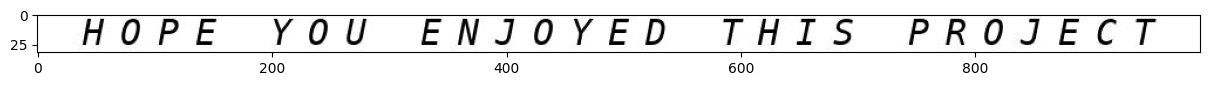

 Prediction: 72 in ascii H
 Prediction: 68 in ascii D
 Prediction: 80 in ascii P
 Prediction: 69 in ascii E
 Prediction: 89 in ascii Y
 Prediction: 68 in ascii D
 Prediction: 85 in ascii U
 Prediction: 69 in ascii E
 Prediction: 78 in ascii N
 Prediction: 74 in ascii J
 Prediction: 68 in ascii D
 Prediction: 89 in ascii Y
 Prediction: 69 in ascii E
 Prediction: 68 in ascii D
 Prediction: 84 in ascii T
 Prediction: 72 in ascii H
 Prediction: 84 in ascii T
 Prediction: 83 in ascii S
 Prediction: 80 in ascii P
 Prediction: 82 in ascii R
 Prediction: 68 in ascii D
 Prediction: 74 in ascii J
 Prediction: 69 in ascii E
 Prediction: 67 in ascii C
 Prediction: 84 in ascii T
the predicted text is  HDPE YDU ENJDYED THTS PRDJECT 
the predict text without spaces is HDPEYDUENJDYEDTHTSPRDJECT
the original text is HOPE YOU ENJOYED THIS PROJECT



In [ ]:
enjoy_test = image.imread('enjoy.jpg')[:,:,0]
print(enjoy_test.shape)
plt.figure(figsize=(15,5))
plt.imshow(enjoy_test, cmap='gray_r')
plt.show()
predict_text(enjoy_test)